## Eksploratorna analiza skupa podataka projektnog zadatka

Skup podataka koji koristimo zove se Fashion-MNIST. Sastoji se od 70 000 slika dimenzija 28x28. Svaka slika definirana je podacima iz 785 stupaca. Prvi stupac sadrži oznaku klase kojoj slika pripada, dakle označava o kojem se odjevnom predmetu radi. Ostali stupci označavaju vrijednosti piksela slike.

Skup podatka podijeljen je, po standardnoj praksi strojnog učenja, na skup za treniranje i testiranje: 60 000 slika i 10 000 slika, respektivno.

Train i test skup opisani su datotekama:
- fashion-mnist_train.csv
- fashion-mnist_test.csv

Korišteni izvori:
- 1.https://www.kaggle.com/faressayah/fashion-classification-mnist-cnn-tutorial/data#STEP-#3:-VISUALIZATION-OF-THE-DATASET
- 2.https://towardsdatascience.com/an-extensive-guide-to-exploratory-data-analysis-ddd99a03199e
- 3.https://github.com/pmf-strojnoucenje/Vjezbe

In [1]:
#import potrebnih biblioteka
import pandas as pd #za manipulaciju podataka pomoću dataframes
import numpy as np #za statističku analizu podataka
import matplotlib.pyplot as plt #za vizualizaciju podataka
import seaborn as sns  #za vizualizaciju podataka
import random

In [2]:
# kreiramo dataframe za train i test skup podataka
#dataframe, u ovom slučaju Pandas DataFrame dvodimenzionalna je struktura koja se može mijenjati, sastoji se od tri glavne komponente: podataka, redaka i stupaca  

fashion_train_df = pd.read_csv('../Desktop/dataset/fashion-mnist_train.csv',sep=',')
fashion_test_df = pd.read_csv('../Desktop/dataset/fashion-mnist_test.csv', sep = ',')

## Analiza skupova train i test

U ovom dijelu Jupyter bilježnice za train i test skup analizirano je sljedeće:
- broj slika u dataframe-ovima
- dimenzija dataframe-a
- imena stupaca dataframe-a
- head i tail dataframe-a
- provjera postojanja NULL vrijednosti
- broj slika u pojedinoj kategoriji (kategorije označene znamenkama 0-9)

### Analiza train skupa

In [3]:
#funkcija info() za dobivanje informacije o klasi objekta, broju redaka, stupaca, memoriji za dataframe datoteke fashion-mnist_train.csv

fashion_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB


In [4]:
#broj slika opisanih u datoteci fashion-mnist_train.csv
#jedan redak datoteke == jedna slika

fashion_train_df.index

RangeIndex(start=0, stop=60000, step=1)

In [5]:
#dimenzija dataframea datoteke fashion-mnist_train.csv
fashion_train_df.shape

(60000, 785)

In [6]:
#stupci datarame-a datoteke fashion-mnist_train.csv
#u outputu vidimo da je svaka slika opisana podacima iz 784 stupca
#784 stupca opisuju 28x28 piksela
#prvi stupac odnosi se na labelu, odnosno na id, slike

fashion_train_df.columns

Index(['label', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=785)

In [7]:
#head dataframe-a (prvih 5 redaka) datoteke fashion-mnist_train.csv

fashion_train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
#prikaz posljednjih redaka dataframea datoteke fashion-mnist_train.csv
fashion_train_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59999,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
#provjera NULL vrijednosti dataframea datoteke fashion-mnist_train.csv
#NULL != 0

print(str(fashion_train_df.isnull().values.any()))

False


In [10]:
#kardinalitet kategorija dataframea datoteke fashion-mnist_train.csv
#svaka slika pripada jednoj od 10 kategorija
#u outputu vidimo da je broj slika koje pripadaju pojedinoj kategoriji jednak za svaku kategoriju

fashion_train_df.groupby('label').size()

label
0    6000
1    6000
2    6000
3    6000
4    6000
5    6000
6    6000
7    6000
8    6000
9    6000
dtype: int64

### Analiza test skupa

In [11]:
#funkcija info() za dobivanje informacije o klasi objekta, broju redaka, stupaca, memoriji za dataframe datoteke fashion-mnist_test.csv

fashion_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 59.9 MB


In [12]:
#broj slika opisanih u datoteci fashion-mnist_test.csv
#jedan redak datoteke == jedna slika

fashion_test_df.index

RangeIndex(start=0, stop=10000, step=1)

In [13]:
#dimenzija dataframe-a datoteke fashion-mnist_test.csv
fashion_test_df.shape

(10000, 785)

In [14]:
#stupci datarame-a datoteke fashion-mnist_test.csv
#u outputu vidimo da je svaka slika opisana podacima iz 784 stupca
#784 stupca opisuju 28x28 piksela
#prvi stupac odnosi se na labelu, odnosno na id, slike

#očekivano, budući da su train i test skupovi nastali iz istog skupa podataka

fashion_train_df.columns

Index(['label', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=785)

In [15]:
#head dataframe-a datoteke fashion-mnist_test.csv

fashion_test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
#prikaz posljednjih redaka dataframea datoteke fashion-mnist_train.csv
fashion_test_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9999,1,0,0,0,0,0,0,0,140,119,...,111,95,75,44,1,0,0,0,0,0


In [17]:
#provjera NULL vrijednosti dataframea datoteke fashion-mnist_test.csv

print(str(fashion_test_df.isnull().values.any()))

False


In [18]:
#kardinalitet kategorija dataframe-a datoteke fashion-mnist_train.csv
#svaka slika pripada jednoj od 10 kategorija
#u outputu vidimo da je broj slika koje pripadaju pojedinoj kategoriji jednak za svaku kategoriju

fashion_test_df.groupby('label').size()

label
0    1000
1    1000
2    1000
3    1000
4    1000
5    1000
6    1000
7    1000
8    1000
9    1000
dtype: int64

Text(0.5, 1.0, 'Klase odjeće - distribucija')

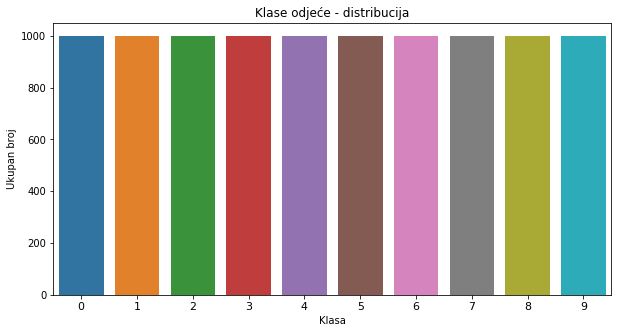

In [19]:
#grafički prikaz prethodne output cell

yy = pd.value_counts(fashion_test_df['label'])

fig, ax = plt.subplots()
fig.set_size_inches(10, 5)

ax = sns.barplot(x = yy.index, y = yy, data = fashion_test_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 0, fontsize = 11)
ax.set(xlabel='Klasa', ylabel='Ukupan broj')
ax.set_title('Klase odjeće - distribucija')

## Prikaz slika

In [20]:
#iz train i test skupova podataka kreiramo nizove podataka da bismo dobili prikaz slike koristeći podatke o pikselima iz pripadnih datoteka
train = np.array(fashion_train_df, dtype = 'float32')
test = np.array(fashion_test_df, dtype='float32')

In [21]:
#prikaz dijela niza train
#svaka slika u nizu opisana je nizom piksela iz pripadnog reda
train

array([[2., 0., 0., ..., 0., 0., 0.],
       [9., 0., 0., ..., 0., 0., 0.],
       [6., 0., 0., ..., 0., 0., 0.],
       ...,
       [8., 0., 0., ..., 0., 0., 0.],
       [8., 0., 0., ..., 0., 0., 0.],
       [7., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [22]:
#detaljan prikaz niza prve slike iz skupa train
train[0]

array([  2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   4.,   0.,   0.,   0.,   0.,   0.,  62.,  61.,  21.,  29.,
        23.,  51., 136.,  61.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  88.,
       201., 228., 225., 255., 115.,  62., 137., 255., 235., 222., 255.,
       135.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,  47., 252., 234., 238., 22

In [23]:
#prikaz dijela niza test
test

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [2., 0., 0., ..., 0., 0., 0.],
       ...,
       [8., 0., 0., ..., 0., 1., 0.],
       [8., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

Za nastavak analize potrebno je naznačiti koja labela (stupac label) predstavlja koju kategoriju odjeće.

- 0: T-shirt/top
- 1: Trouser
- 2: Pullover
- 3: Dress
- 4: Coat
- 5: Sandal
- 6: Shirt
- 7: Sneaker
- 8: Bag
- 9: Ankle boot

In [24]:
#deklariranje niza klasa

class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Text(0.5, 1.0, 'Ankle boot')

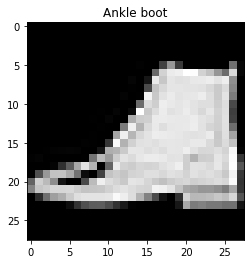

In [25]:
#prikaz random slike iz train skupa u gray-scale-u

i = random.randint(1,60000) #odabir random indeksa od 1 do 60,000
plt.imshow(train[i,1:].reshape((28,28)) , cmap = 'gray') #reshape i plot slike
label_index = fashion_train_df["label"][i]
plt.title(f"{class_names[label_index]}")

Text(0.5, 1.0, 'Shirt')

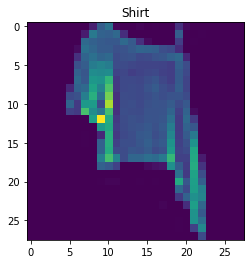

In [26]:
#prikaz random slike iz train skupa u boji

i = random.randint(1,60000) #odabir random indeksa od 1 do 60,000
plt.imshow(train[i,1:].reshape((28,28))) # reshape i plot slike
label_index = fashion_train_df["label"][i]
plt.title(f"{class_names[label_index]}")

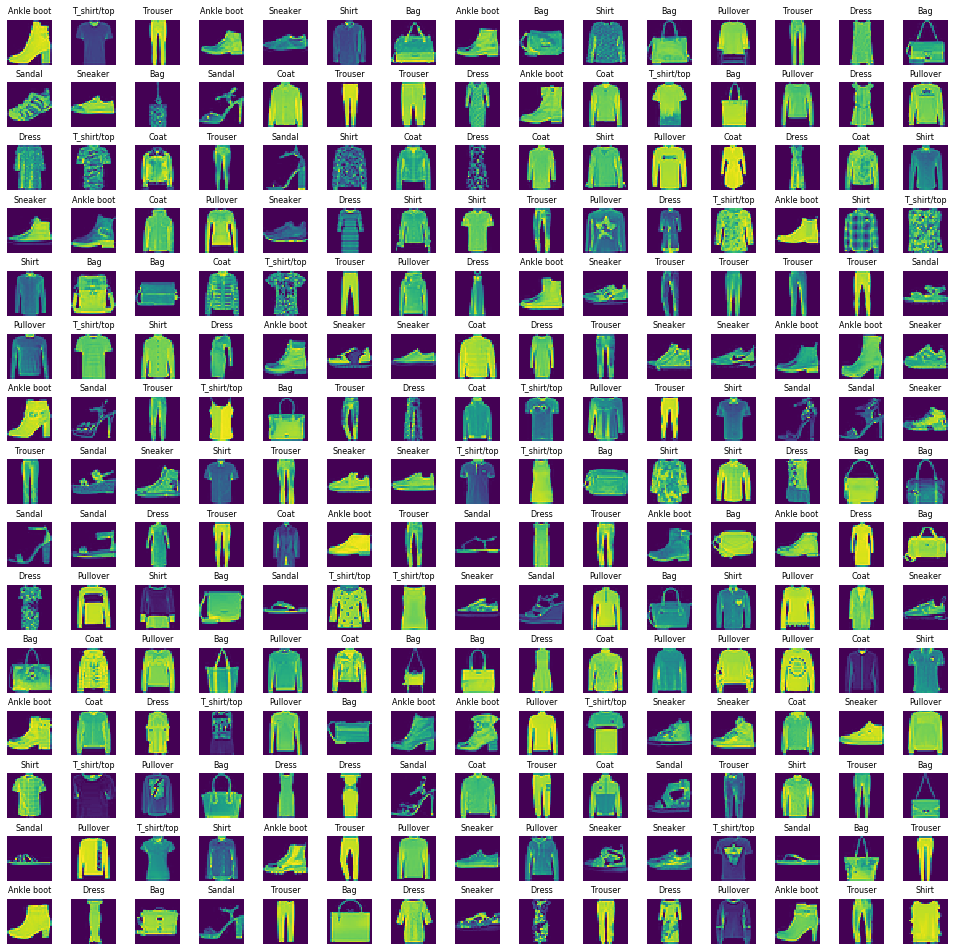

In [27]:
#prikaz više slika u grid formatu [1]
#izvršavanje ove input cell zahtijeva malo više vremena

#definiramo dimezije grid formata (15x15 slika)
W_grid = 15
L_grid = 15

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))
axes = axes.ravel() #spljoštenje matrice 15 x 15 u niz
n_train = len(train) #duljina train skupa

for i in np.arange(0, W_grid * L_grid): 
    index = np.random.randint(0, n_train)
    #čitanje i prikaz slike označenog indeksa  
    axes[i].imshow( train[index,1:].reshape((28,28)) )
    label_index = int(train[index,0])
    axes[i].set_title(class_names[label_index], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)